In [ ]:
import numpy as np
def campaign(spending, cpm, conversion_rate):
  # Abritrary CPM
# Conversion rate refers to the a customer making a transaction 
  return np.random.binomial(spending/cpm, conversion_rate)

In [ ]:
# Conversion rate is assumed to be normally distributed
def get_conversion_rate(mean, std):
  # Either one is selected depending on which one is higher
  # deleted *1000
  conversion_rate = max(mean+np.random.normal()*std, 0.000001)
  return conversion_rate

In [ ]:
# * Changed spending to 30000
spending = 30000
# Change from cpm to cvr (0.0044)
# Cost per click
cpm = 1.16
# CVR
conversion_rate_mean = 0.027
# Let's just assume it to be the same with the example
conversion_rate_std = conversion_rate_mean*0.4

In [ ]:
# New customers coming after campaign 
conversion_rate = get_conversion_rate(conversion_rate_mean, conversion_rate_std)
# New customers in a certain timeframe
cohort_size = campaign(spending, cpm, conversion_rate)
# Get the cost of acquiring a customer
CAC = spending/cohort_size
print('New customers: ', cohort_size)
print('CAC: ', CAC)

New customers:  1072
CAC:  27.98507462686567


In [ ]:
# Model how the cohort changes over time
def simulate_cohort(cohort_size, churn_rate, transactions, price, retention_cost, period = 5):
  customers_left = []
  expenses = []
  profit = []
  for i in range(period):
    for customer in range(cohort_size):
      churn_random_num = np.random.random()
      # If value is greater than certain threshold, assume customer stays
      if churn_random_num <= churn_rate:
        cohort_size = cohort_size - 1
      customers_left.append(cohort_size)
      # Transactions = payments
      expenses.append(cohort_size*transactions*price)
      profit.append(cohort_size*(transactions*price-retention_cost))
  return customers_left, expenses, profit

In [ ]:
# Arbitrary values
churn_rate = 0.20
# Number of annual transactions per average cohort member
transactions = 6
# Price of goods sold per average transaction
price = 10
# Annual cost of retaining/servicing customer
retention_cost = 20

customers_left, expenses, profit = simulate_cohort(cohort_size, churn_rate, transactions, price, retention_cost, period = 5)
print(profit)


[42880, 42880, 42880, 42880, 42880, 42880, 42880, 42880, 42880, 42880, 42880, 42880, 42880, 42880, 42880, 42880, 42880, 42840, 42840, 42800, 42800, 42800, 42800, 42800, 42800, 42800, 42800, 42800, 42760, 42760, 42760, 42760, 42760, 42720, 42720, 42720, 42720, 42720, 42720, 42680, 42680, 42680, 42640, 42600, 42600, 42600, 42600, 42600, 42560, 42520, 42520, 42520, 42520, 42520, 42520, 42520, 42520, 42520, 42520, 42480, 42480, 42440, 42440, 42440, 42440, 42440, 42440, 42440, 42440, 42440, 42440, 42440, 42440, 42440, 42440, 42440, 42440, 42400, 42360, 42320, 42280, 42240, 42200, 42200, 42200, 42200, 42160, 42120, 42120, 42120, 42080, 42080, 42080, 42040, 42000, 42000, 42000, 42000, 42000, 42000, 41960, 41920, 41920, 41920, 41920, 41920, 41880, 41880, 41880, 41880, 41880, 41840, 41840, 41840, 41840, 41840, 41800, 41800, 41760, 41760, 41760, 41720, 41720, 41720, 41720, 41720, 41720, 41720, 41720, 41720, 41720, 41680, 41640, 41640, 41640, 41640, 41640, 41640, 41640, 41640, 41640, 41600, 41600

In [ ]:
from decimal import *
# Value of a dollar decreases over time
def present_value(cashflows, rate):
  pvs = []
  for n, val in enumerate(cashflows):
    pvs.append((val/(1+rate)**(n+1)))
  return pvs

In [ ]:
# Customer lifetime value (CLTV)
rate = 0.1
# ! Need to fix (34, 'Numerical result out of range') when spending exceeds certain value
pvs = present_value(profit, rate)
cohort_value = sum(pvs)

print('Total Cohort Value: ', int(cohort_value))
print('CLTV: ', int(cohort_value/cohort_size))
print('CLTV-CAC Spread: ', int(cohort_value/cohort_size - CAC))

Total Cohort Value:  428574
CLTV:  399
CLTV-CAC Spread:  371


In [ ]:
# Simulate marketing campaigns
import pandas as pd
cohort_size_list = []
CAC_list = []
CLTV_list = []
t = 1000

for i in range(t):
    
    # Run marketing campaign sim
    conversion_rate = get_conversion_rate(conversion_rate_mean, 
                                      conversion_rate_std)
    cohort_size = campaign(spending, cpm, conversion_rate)
    # * To deal with "ZeroDivisionError: division by zero", added an if statement
    if cohort_size != 0:
      CAC = spending/cohort_size
    
    # Simulate the resulting cohort
      customers_left, expenses, profit = simulate_cohort(cohort_size, churn_rate, transactions, price, retention_cost, period = 5)
      
      cohort_value = sum(present_value(profit, rate))
      
      cohort_size_list.append(cohort_size)
      CAC_list.append(CAC)
      CLTV_list.append(cohort_value/cohort_size)
    
# Store simulation results in a dataframe
results_df = pd.DataFrame()
results_df['starting_cohort_size'] = cohort_size_list
results_df['CLTV'] = CLTV_list
results_df['CAC'] = CAC_list
results_df['Spread'] = results_df['CLTV'] - results_df['CAC']

plot_df = results_df[results_df['CAC']<=t]

In [ ]:
results_df

,starting_cohort_size,CLTV,CAC,Spread
0,672,398.824361,44.642857,354.181504
1,868,399.065111,34.562212,364.502899
2,1266,399.683250,23.696682,375.986567
3,196,397.222619,153.061224,244.161395
4,948,399.502656,31.645570,367.857086
...,...,...,...,...
991,260,394.699100,115.384615,279.314485
992,744,398.480044,40.322581,358.157463
993,250,396.564533,120.000000,276.564533
994,718,398.769028,41.782730,356.986298


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


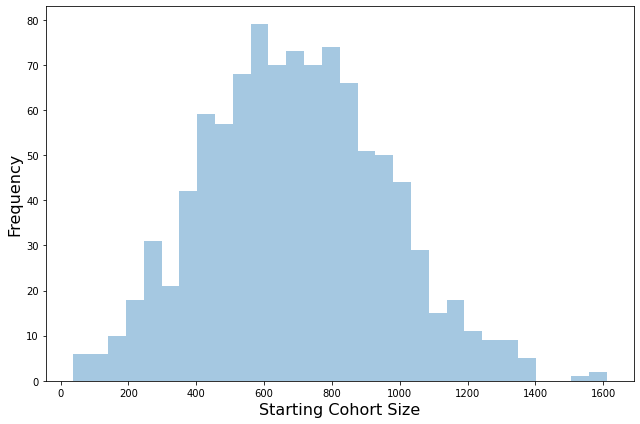

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(figsize=(9,6))
sns.distplot(plot_df['starting_cohort_size'], kde=False, bins=30)

ax.set_xlabel("Starting Cohort Size",fontsize=16)
ax.set_ylabel("Frequency",fontsize=16)
plt.tight_layout()

plt.savefig(fname='cohort_hist', dpi=150)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


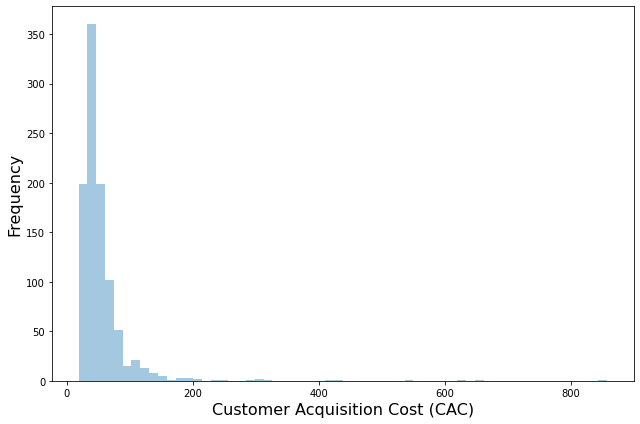

In [ ]:
fig, ax = plt.subplots(figsize=(9,6))
sns.distplot(plot_df['CAC'], kde=False, bins=60)

ax.set_xlabel("Customer Acquisition Cost (CAC)",fontsize=16)
ax.set_ylabel("Frequency",fontsize=16)
plt.tight_layout()

plt.savefig(fname='CAC_hist', dpi=150)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


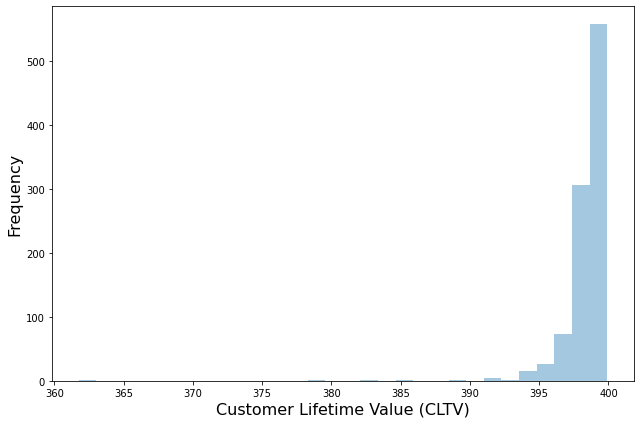

In [ ]:
fig, ax = plt.subplots(figsize=(9,6))
sns.distplot(plot_df['CLTV'], kde=False, bins=30)

ax.set_xlabel("Customer Lifetime Value (CLTV)",fontsize=16)
ax.set_ylabel("Frequency",fontsize=16)
plt.tight_layout()